In [22]:
import numpy as np
import matplotlib.pyplot as plt

## Perceptron stuff

In [23]:
# AND gate
X = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1],
])

y_flat = np.array([0, 0, 0, 1], dtype=np.int8)
# y_flat = np.array([0, 1, 1, 1], dtype=np.int8)
y = y_flat[:, np.newaxis]

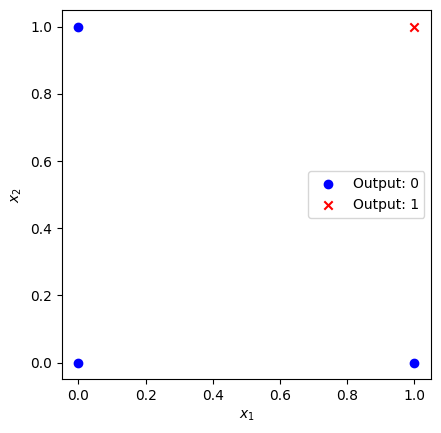

In [24]:
# plotting stuff
def plot_inputs(X, y):
    y_flat = y.flatten()
    fig, ax = plt.subplots(1, 1)
    ax.scatter(X[y_flat == 0,1],X[y_flat == 0,2],color="blue", marker="o", label="Output: 0")
    ax.scatter(X[y_flat == 1,1],X[y_flat == 1,2],color="red", marker="x", label="Output: 1")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_aspect("equal")
    return fig, ax

def plot_decision(ax, w, colour=[0, 0, 0, 0.2], label=None):
    # We get a 1 if w0 + w1x1 + w2x2 >= 0, and a 0 otherwise.
    # solving for x2, we get x2 >= -(w0 + w1x1) / w2
    if abs(w[2]) > 0:
        slope = -w[1] / w[2]
        intercept = -w[0] / w[2]
        decision_x = np.array([-0.1, 1.1])
        ax.plot(decision_x, decision_x * slope + intercept, color=colour, label=label)

fig, ax = plot_inputs(X, y)
leg = ax.legend()

Epoch 0: w = [0. 0. 0.]
Epoch 1: w = [0. 1. 1.]
Epoch 2: w = [-1.  2.  1.]
Epoch 3: w = [-2.  2.  1.]
Epoch 4: w = [-2.  2.  2.]
Epoch 5: w = [-3.  2.  1.]
Final w = [-3.  2.  1.]


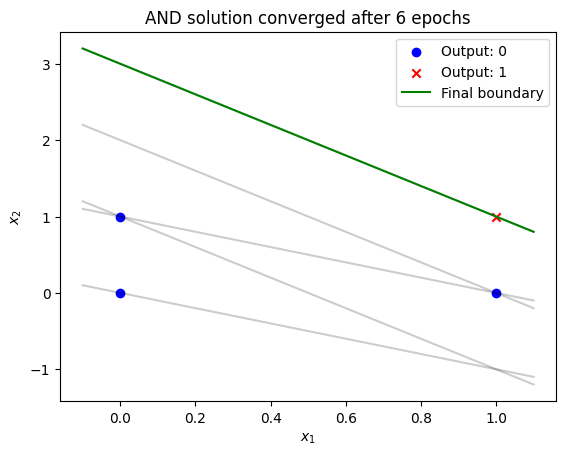

In [25]:
eta = 1 # early choice, gives integer weights

def step(v):
    """Heaviside step function"""
    return (v >= 0).astype(int)

# Initialize weights to zero
w = np.zeros((3, 1))

y_hat = X @ w
epochs = 0

while not all(y == y_hat):
    # one instance at a time
    plot_decision(ax, w)
    print(f"Epoch {epochs}: w = {w.flatten()}")
    for i in range(4):
        x_i_T = X[i:i+1, :] # preserve the singleton dimension
        y_hat[i] = step(x_i_T @ w)
        if y_hat[i] != y[i]:
            w += eta * (y[i] - y_hat[i]) * x_i_T.T
    
    epochs += 1

print(f"Final w = {w.flatten()}")

plot_decision(ax, w, "green", "Final boundary")
ax.set_aspect("auto")
leg.remove()
leg = ax.legend()
ax.set_title(f"AND solution converged after {epochs} epochs")
fig


[0 1 1 0]


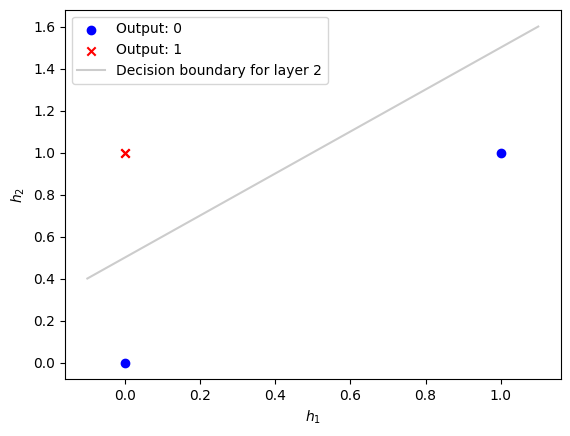

In [26]:
# Verify XOR solution
# X is unchanged from prior inputs
y_xor = np.array([0, 1, 1, 0])
w_1 = np.array([
    [-3/2, -1/2],
    [1, 1],
    [1, 1],
])

# intermediate "hidden" space - inputs to the next layer
H = step(X @ w_1)
# add on the bias term
H = np.column_stack((np.ones(4), H))
w_2 = np.array([
    [-0.5],
    [-1],
    [1],
])

fig_h, ax_h = plot_inputs(H, y_xor)
plot_decision(ax_h, w_2, label="Decision boundary for layer 2")
ax_h.set_aspect("auto")
ax_h.set_xlabel("$h_1$")
ax_h.set_ylabel("$h_2$")
ax_h.legend()

print(step(H @ w_2).flatten())

## Backpropagation examples

Final prediction: 1.0014069403995842


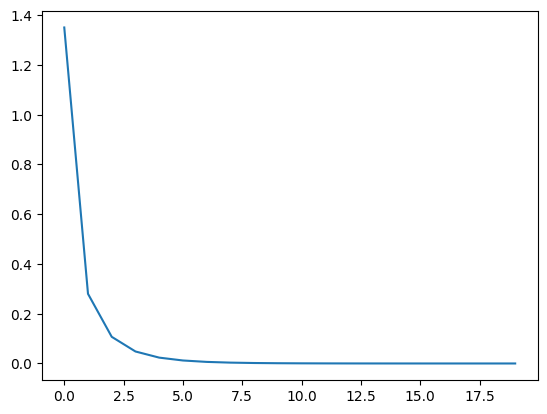

In [27]:
# toy mlp example
# forward pass
x = np.array([2, 3])
y = 1
w1 = np.array([[-0.78, 0.13], [0.85, 0.23]])
w2 = np.array([1.8, 0.40])

iterations = 20
eta = 0.01
loss = np.zeros(iterations)

for i in range(iterations):
    # forward pass
    y_hat = x @ w1 @ w2
    
    # update loss to keep track of performance
    loss[i] = (y_hat - y)**2

    # backpropagate!
    w2_partials = (y_hat - y) * (x @ w1)
    w1_partials = w2_partials @ x

    # take a step in the opposite direction
    w1 = w1 - eta * w1_partials
    w2 = w2 - eta * w2_partials

plt.plot(loss)

# check how well we did
print("Final prediction:", x @ w1 @ w2)